In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss


In [2]:
data = load_iris()
X = data.data  # Feature matrix
y = data.target  # Target vector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
model = LogisticRegression(max_iter=200, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [4]:
accuracy = accuracy_score(y_test, y_pred)
multi_class_loss = log_loss(y_test, y_pred_proba)
class_report = classification_report(y_test, y_pred, target_names=data.target_names)

print("Accuracy:", accuracy)
print("Multiclass Log Loss:", multi_class_loss)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Multiclass Log Loss: 0.11128299003032528
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


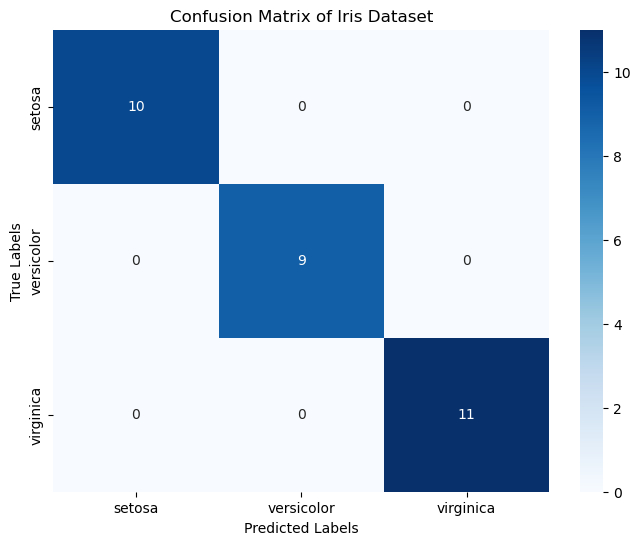

In [5]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Iris Dataset')
plt.show()